# Tutorial 13: Skyrmion in a disk

> Interactive online tutorial:
> [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ubermag/oommfc/master?filepath=docs%2Fipynb%2Findex.ipynb)

In [1]:
import oommfc as oc
import discretisedfield as df

In [2]:
mesh = oc.Mesh(p1=(-50e-9, -50e-9, 0), p2=(50e-9, 50e-9, 10e-9), cell=(5e-9, 5e-9, 5e-9))

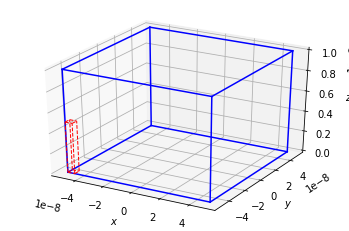

In [4]:
%matplotlib inline
mesh.mpl()

In [7]:
system = oc.System(name='skyrmion')

system.hamiltonian = oc.Exchange(A=1.6e-11) + oc.DMI(D=4e-3, kind='Cnv') + \
                     oc.UniaxialAnisotropy(K1=0.51e6, u=(0, 0, 1)) + oc.Demag() + oc.Zeeman(H=(0, 0, 2e5))

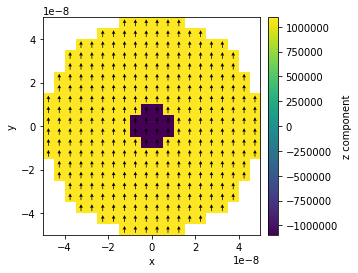

In [8]:
Ms = 1.1e6

def Ms_fun(pos):
    x, y, z = pos
    if (x**2 + y**2)**0.5 < 50e-9:
        return Ms
    else:
        return 0

def m_init(pos):
    x, y, z = pos
    if (x**2 + y**2)**0.5 < 10e-9:
        return (0, 0.1, -1)
    else:
        return (0, 0.1, 1)

system.m = df.Field(mesh, value=m_init, norm=Ms_fun)

system.m.plane('z').mpl()

2019/08/26 15:59: Running OOMMF (skyrmion.mif) ... (1.9 s)


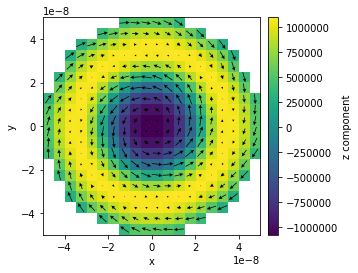

In [9]:
md = oc.MinDriver()
md.drive(system)

system.m.plane('z').mpl()

## Other

More details on various functionality can be found in the [API Reference](https://oommfc.readthedocs.io/en/latest/).